# Introduction to landscape evolution modeling (LEMs)

This introduction uses the Fastscape landscape evolution model (LEM) described [here](https://fastscape.org) (Bovy & Lance, 2023). This Jupyter notebook is ever-so-slightly adapted for ECS34 from the Fastscape “Basic” and “Alt” model tutorials found on this [GitHub repository](https://github.com/fastscape-lem/fastscape-demo).  

Don’t worry, this intro requires zero coding skills! All you have to do **to run a block of code is click inside it and hit SHIFT + ENTER**. That’s it!



***Run the first cell below to import the tools we need to run and visualize the Fastscape model.***

(It may take a few seconds... you'll know when it's done when the bracket on the left of the cell goes from looking like this [*] to this [1].)

**Reference:**
Benoit Bovy, & Raphael Lange. (2023). fastscape-lem/fastscape: Release v0.1.0 (0.1.0). Zenodo. [https://doi.org/10.5281/zenodo.8375653](https://doi.org/10.5281/zenodo.8375653)  

In [1]:
import numpy as np
import xarray as xr
import xsimlab as xs
import fastscape
import matplotlib.pyplot as plt
import hvplot.xarray
%matplotlib inline

hvplot.output(widget_location='bottom')

***Run the cell below to import the model.***

In [2]:
from fastscape.models import basic_model

## Visualizing the model

***Run the cell below to view a map of the model set up.*** Each yellow box represents a model input and each blue bubble represents a process in the model. You don’t need to understand all of these terms or how they operate in the model, but **try to figure out how at least one of the processes is interacting with other components in the model.**


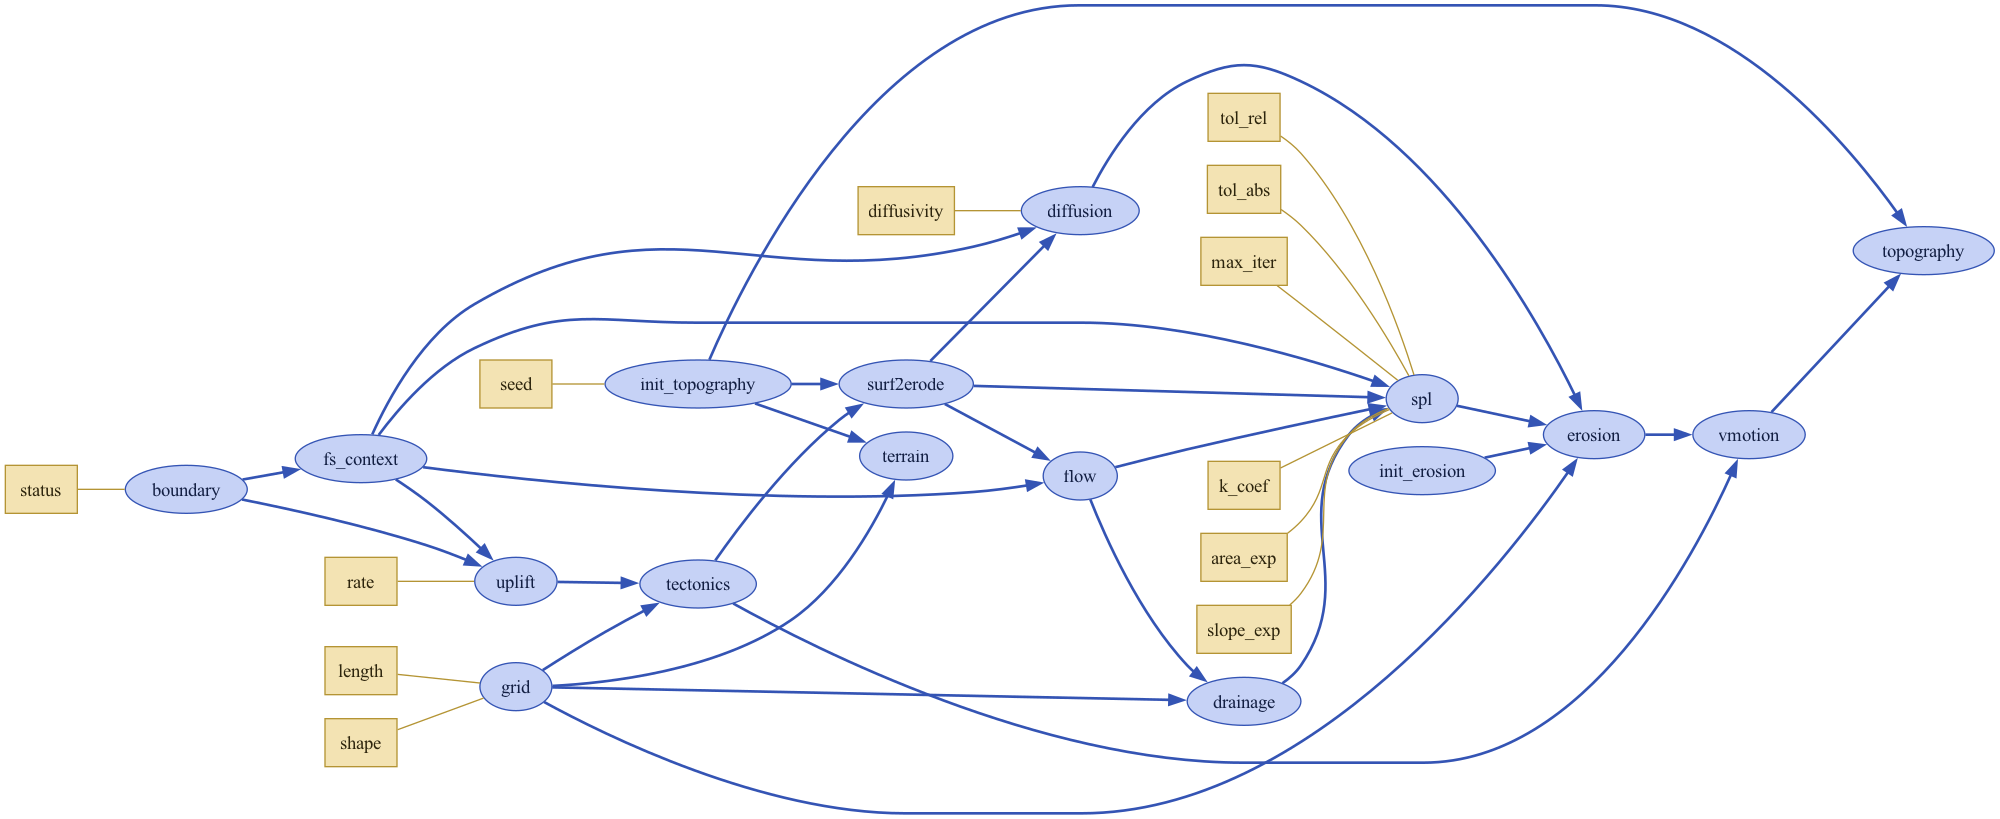

In [3]:
basic_model.visualize(show_inputs=True)

***Run the cell below, without updating any values.***


In [3]:
nx = 101
ny = 101

in_ds = xs.create_setup(
    model=basic_model,
    clocks={
        'time': np.linspace(0., 1e6, 101),
        'out': np.linspace(0., 1e6, 21)
    },
    master_clock='time',
    input_vars={
        'grid__shape': [101, 101],
        'grid__length': [1e4, 1e4],
        'boundary__status': ['looped', 'looped', 'fixed_value', 'fixed_value'],
        'uplift__rate': 1e-3,
        'spl': {'k_coef': 1e-4, 'area_exp': 0.4, 'slope_exp': 1.},
        'diffusion__diffusivity': 1e-1
    },
    output_vars={
        'topography__elevation': 'out',
        'drainage__area': 'out',
        'flow__basin': 'out',
        'spl__chi': None
    }
)

/opt/homebrew/anaconda3/envs/fastscape-demo/lib/python3.13/site-packages/xsimlab/xr_accessor.py:229: FutureWarning: variable 'time' with name matching its dimension will not be automatically converted into an `IndexVariable` object in the future.
  xr_var = as_variable(data, name=dim)
/opt/homebrew/anaconda3/envs/fastscape-demo/lib/python3.13/site-packages/xsimlab/xr_accessor.py:229: FutureWarning: variable 'out' with name matching its dimension will not be automatically converted into an `IndexVariable` object in the future.
  xr_var = as_variable(data, name=dim)


## Examine the model attributes

You've now defined a Dataset that includes your input values. 

***Run the block of code below.*** What do you learn about this particular attribute?

In [4]:
in_ds.spl__k_coef

<xarray.DataArray 'spl__k_coef' ()> Size: 8B
array(0.0001)
Attributes:
    description:  bedrock channel incision coefficient

## Run the model

***Run the cell below to run the model.***

This will likely take a bit of time to run. It will look like nothing's happening, but that's because we haven't run any code to visualize the outputs yet. 

In [5]:
out_ds = in_ds.xsimlab.run(model=basic_model)

## Analyse, plot and save the results 

Now let's take a look at our model output! 

***Run the cell below to create an interactive visualization.*** Use the slider to see how the landscape evolves through time.

In [6]:
dem = out_ds.topography__elevation.hvplot.image(x='x',y='y',
                                                cmap='inferno',
                                                groupby='out',
                                                invert=True,
                                                width=500,      
                                                height=333)
swath = out_ds.mean(dim='x').topography__elevation.hvplot(groupby='out',
                                                          c='black',
                                                          xlabel='', ylabel='Elevation (m)',
                                                          title='Basic Model',
                                                          ylim=(0, 300), 
                                                          width=500, 
                                                          height=160
                                                          )


basicm_plot = (swath + dem).cols(1)
basicm_plot

:Layout
   .DynamicMap.I  :DynamicMap   [out]
      :Curve   [y]   (topography__elevation)
   .DynamicMap.II :DynamicMap   [out]
      :Image   [x,y]   (topography__elevation)

## Run the model again without diffusion

Let's see how the landscape evolves without including diffusion.

***Run the cell below to create another instance of the model that doesn't include diffusion.*** How does this change the interactions in the model?

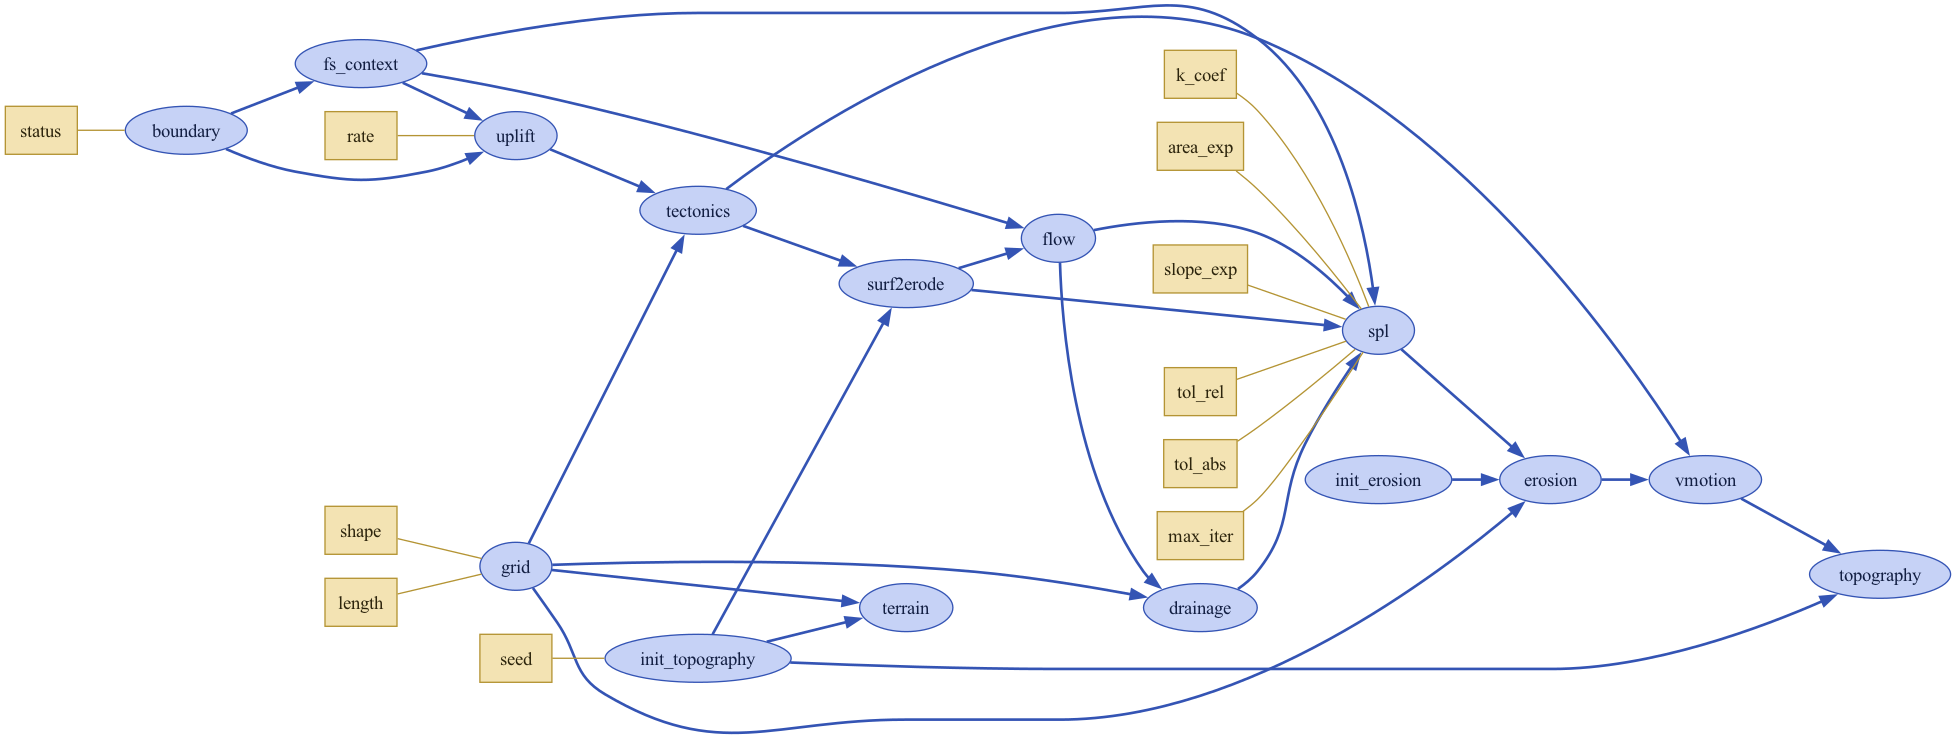

In [7]:
no_diff_model = basic_model.drop_processes('diffusion')

no_diff_model.visualize(show_inputs=True)

We now need to create another model set up, run the new model, and then create a new visualization. Here, you'll be able to see the new model results next to those from the first one we ran. How do the results change without hillslope diffusion?

***Run the next four blocks of code without changing any values.***

In [9]:
in_nd = xs.create_setup(
    model=no_diff_model,
    clocks={
        'time': np.linspace(0., 1e6, 101),
        'out': np.linspace(0., 1e6, 21)
    },
    master_clock='time',
    input_vars={
        'grid__shape': [101, 101],
        'grid__length': [1e4, 1e4],
        'boundary__status': ['looped', 'looped', 'fixed_value', 'fixed_value'],
        'uplift__rate': 1e-3,
        'spl': {'k_coef': 1e-4, 'area_exp': 0.4, 'slope_exp': 1.},

    
    },
    output_vars={
        'topography__elevation': 'out',
        'drainage__area': 'out',
        'flow__basin': 'out',
        'spl__chi': None
    }
)

/opt/homebrew/anaconda3/envs/fastscape-demo/lib/python3.13/site-packages/xsimlab/xr_accessor.py:229: FutureWarning: variable 'time' with name matching its dimension will not be automatically converted into an `IndexVariable` object in the future.
  xr_var = as_variable(data, name=dim)
/opt/homebrew/anaconda3/envs/fastscape-demo/lib/python3.13/site-packages/xsimlab/xr_accessor.py:229: FutureWarning: variable 'out' with name matching its dimension will not be automatically converted into an `IndexVariable` object in the future.
  xr_var = as_variable(data, name=dim)


In [10]:
out_nd = in_nd.xsimlab.run(model=no_diff_model)

In [12]:
dem_nd = out_nd.topography__elevation.hvplot.image(x='x',y='y',
                                          cmap='inferno',
                                          groupby='out',
                                          invert=True,
                                          width=500,      
                                          height=333)
swath_nd = out_nd.mean(dim='x').topography__elevation.hvplot(groupby='out',
                                                          c='black',
                                                          xlabel='', ylabel='Elevation (m)',
                                                          title='No Diffusion',
                                                          ylim=(0, 300), 
                                                          width=500, 
                                                          height=160
                                                          )


nd_plot = (swath_nd + dem_nd).cols(1)

In [13]:
all_plt = (swath + swath_nd + dem + dem_nd).cols(2)
all_plt

:Layout
   .DynamicMap.I   :DynamicMap   [out]
      :Curve   [y]   (topography__elevation)
   .DynamicMap.II  :DynamicMap   [out]
      :Curve   [y]   (topography__elevation)
   .DynamicMap.III :DynamicMap   [out]
      :Image   [x,y]   (topography__elevation)
   .DynamicMap.IV  :DynamicMap   [out]
      :Image   [x,y]   (topography__elevation)

## Create your own version of the model

If there's still time in class, ***change at least one of the input values in the model set up below*** to see its effect on landscape evolution.

In [15]:
nx = 101
ny = 101

in_my = xs.create_setup(
    model=basic_model,
    clocks={
        'time': np.linspace(0., 1e6, 101),
        'out': np.linspace(0., 1e6, 21)
    },
    master_clock='time',
    input_vars={
        'grid__shape': [101, 101],
        'grid__length': [1e4, 1e4],
        'boundary__status': ['looped', 'looped', 'fixed_value', 'fixed_value'],
        'uplift__rate': 1e-3,
        'spl': {'k_coef': 1e-4, 'area_exp': 0.4, 'slope_exp': 1.},
        'diffusion__diffusivity': 1e-1
    },
    output_vars={
        'topography__elevation': 'out',
        'drainage__area': 'out',
        'flow__basin': 'out',
        'spl__chi': None
    }
)

In [16]:
out_my = in_my.xsimlab.run(model=basic_model)

In [18]:
dem_my = out_my.topography__elevation.hvplot.image(x='x',y='y',
                                          cmap='inferno',
                                          groupby='out',
                                          invert=True,
                                          width=500,      
                                          height=333)
swath_my = out_my.mean(dim='x').topography__elevation.hvplot(groupby='out',
                                                          c='black',
                                                          xlabel='', ylabel='Elevation (m)',
                                                          title='My model',
                                                          ylim=(0, 300), 
                                                          width=500, 
                                                          height=160
                                                          )


my_plot = (swath_my + dem_my).cols(1)
my_plt = (swath + swath_my + dem + dem_my).cols(2)
my_plt

:Layout
   .DynamicMap.I   :DynamicMap   [out]
      :Curve   [y]   (topography__elevation)
   .DynamicMap.II  :DynamicMap   [out]
      :Curve   [y]   (topography__elevation)
   .DynamicMap.III :DynamicMap   [out]
      :Image   [x,y]   (topography__elevation)
   .DynamicMap.IV  :DynamicMap   [out]
      :Image   [x,y]   (topography__elevation)